# Premiere Etape : Data Processing


1.   <b> Simulation forward de l'évolution des Poids de chaque action au cours du temps </b> :

        

*   Market Capj_0 = Weightj_0 * Pricej_0
*   Market Capj_i+1 = Market Capj_i * Pricej_i+1 / Pricej_i
*   Weightj_i+1 = Market Capj_i+1 / somme k de 1 a N (Market Capk_i+1)

---

2.   <b> calcul du divisor à la date finale (va etre utilisé pour le ptf reconstruit) </b>:


*   Divisor = somme des prix finals des actions * poids / prix du cac40 final


















In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#importe le fichier cac40.xls dans la partie a gauche avant de tourner la cellule
#Table des poids
Initial_Weights = pd.read_excel("cac40.xls", sheet_name = "Poids", header = 0, names = ["company", "delete", "weights"]   )
Initial_Weights = Initial_Weights[["company", "weights"]].copy()

#Table des prix
Prices = pd.read_excel("cac40.xls", sheet_name = "Données quotidiennes", header= 0, index_col = 0)


In [3]:
Prices.head(5)

,CAC 40,Accor SA,Air Liquide,Alcatel-Lucent,Alstom,Arcelor Mittal,AXA SA,BNP Paribas,Bouygues,Cap Gemini SA,...,Societe Generale,STMicroelectronics NV,Suez SA,Total SA,Unibail-Rodamco,Vallourec,Veolia Environnement,Vinci SA,Vivendi,Tecnip
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-02,5798.90,40.6441,51.4233,57.50,243.4292,2.75,37.6608,46.2384,41.0608,168.5,...,61.0437,42.59,NaN,39.0814,44.4303,10.8684,45.2226,16.4820,68.0,35.6527
2001-01-03,5684.05,41.0413,51.0560,54.50,247.4619,2.84,37.1290,45.3454,40.2027,158.0,...,60.4393,40.10,NaN,38.7113,44.6932,10.5093,45.2226,16.0770,67.5,36.8572
2001-01-04,5815.99,43.2919,52.4251,62.30,244.7124,3.20,37.0565,46.9330,45.9092,166.0,...,65.0885,45.20,NaN,37.9218,44.4303,10.5772,40.9435,15.4634,70.6,34.8818
2001-01-05,5758.02,44.0674,52.7590,61.65,241.8711,3.10,35.7270,47.4539,46.3383,166.9,...,65.0885,44.25,NaN,37.9958,44.7195,10.4802,41.5756,16.2979,70.7,35.8936
2001-01-08,5732.80,44.5402,53.3934,61.45,229.1314,3.10,35.3161,47.1314,43.7639,166.9,...,66.7622,43.40,NaN,38.4646,44.9298,10.6258,42.6940,15.7947,70.1,36.5922


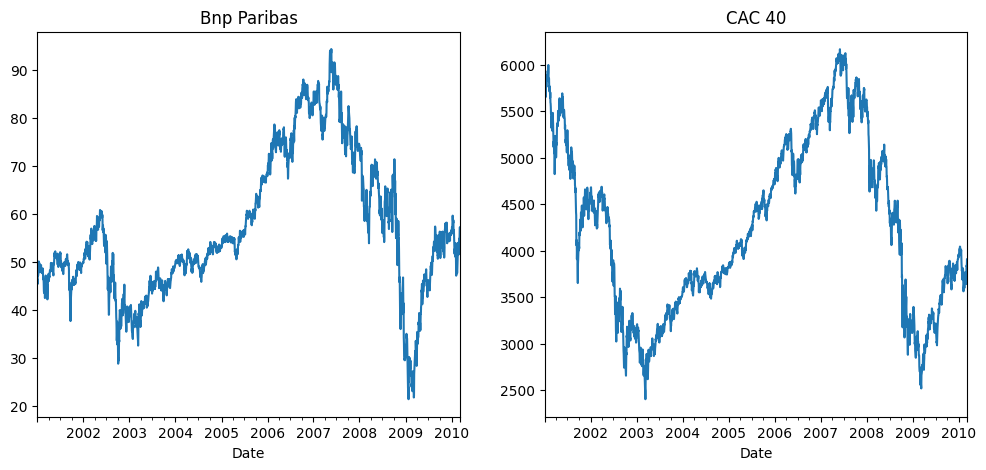

In [4]:
fig, ax = plt.subplots(nrows = 1, ncols =2 , figsize = (12, 5))
Prices["BNP Paribas"].plot(ax = ax[0], label = "BNP Paribas")
ax[0].set_title("Bnp Paribas")
Prices["CAC 40"].plot(ax = ax[1], label = "CAC 40")
ax[1].set_title("CAC 40")
plt.show()

In [5]:
#Je crée une table avec la meme tete que prices, ou je mettrai l'evolution des poids
Weights = pd.DataFrame(columns=Prices.columns[1:], index=Prices.index)
iw = Initial_Weights.weights
Weights.iloc[0] = iw.values

Market_cap = Weights.iloc[0] * Prices.iloc[0, 1:]
for i in range(1, len(Weights)):
  Market_cap = Market_cap * Prices.iloc[i, 1:] / Prices.iloc[i-1, 1:]
  Weights.iloc[i] = Market_cap / Market_cap.sum()


In [6]:
Weights.sum(axis=1).head(5) # : tout somme à 1, super

,0
Date,
2001-01-02,1.0
2001-01-03,1.0
2001-01-04,1.0
2001-01-05,1.0
2001-01-08,1.0


In [7]:
Dividor = (Prices.iloc[-1, 1:] * Weights.iloc[-1]).sum() / Prices.iloc[-1, 0]
print(Dividor)

0.016652947303975953


In [8]:
CAC40 = Prices["CAC 40"]
Reconst_CAC40 = Prices.iloc[: , 1:] * Weights
Reconst_CAC40 = Reconst_CAC40.sum(axis=1)/Dividor

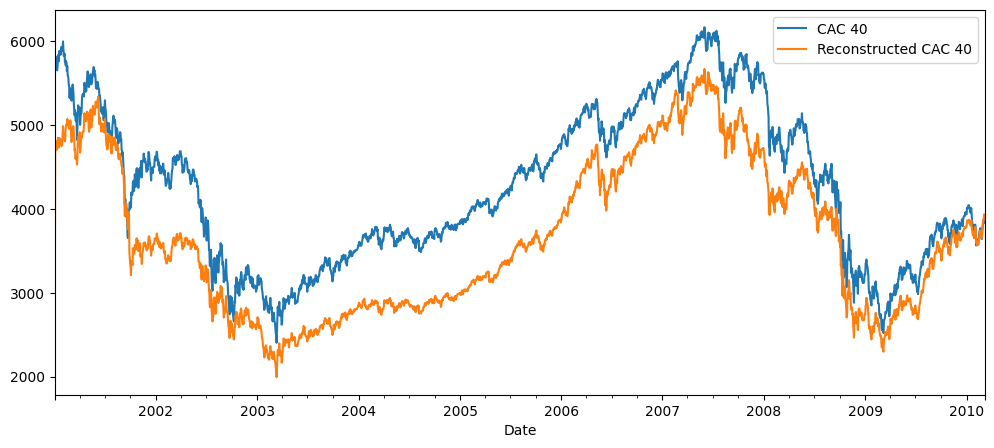

In [9]:
pd.concat([CAC40, Reconst_CAC40], axis=1).plot(figsize=(12, 5))
plt.legend(["CAC 40", "Reconstructed CAC 40"])
plt.show()

# Deuxieme Etape :  Augmented Dickey Fuller Test

tester whether the time series are <b> integrated of order 1 (I(1)) </b>

In [10]:
from statsmodels.tsa.stattools import adfuller
print(adfuller(CAC40))
print(adfuller(Reconst_CAC40))

(np.float64(-2.054492608961532), np.float64(0.26320241543002093), 18, 2377, {'1%': np.float64(-3.433104049600873), '5%': np.float64(-2.862756696812544), '10%': np.float64(-2.5674176995127014)}, np.float64(26127.81208540479))
(np.float64(-1.6137337317580949), np.float64(0.4760159524874361), 18, 2377, {'1%': np.float64(-3.433104049600873), '5%': np.float64(-2.862756696812544), '10%': np.float64(-2.5674176995127014)}, np.float64(25593.62400196385))


On remarque Que les p-Value des tests sont respectivement 0.26 et 0.47, toute les deux plus grande que 0.05
On differencie les series Selon la régle :
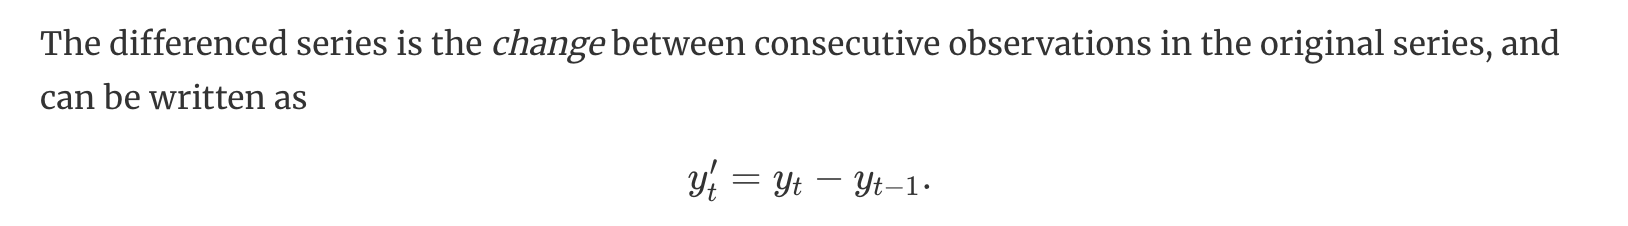

In [11]:
Diff_CAC40 = CAC40.diff()
Diff_Recon_CAC40 = Reconst_CAC40.diff()
print(f" La p-Value pour Delta_CAC40 est {adfuller(Diff_CAC40[1:])[1]:.2e} ")
print(f" La p-Value pour Delta_CAC40 est {adfuller(Diff_Recon_CAC40[1:])[1]:.2e} ")

 La p-Value pour Delta_CAC40 est 5.15e-20 
 La p-Value pour Delta_CAC40 est 2.96e-19 




*   La P-value est maintnant bcp plus petite que 0.05 de l'ordre de $$10^{-20}$$
<b> Donc nos Series sont effectivement I(1) </b>



# Troisieme Etape :  Construction des benchmarks + et -


In [12]:
cac40Ret = Reconst_CAC40.pct_change().dropna()
prime=0.15
nDays=252
benchPlusRet = cac40Ret+prime/nDays
benchPlus = [Reconst_CAC40.iloc[0]]
for r in benchPlusRet:
    benchPlus.append(benchPlus[-1] * (1 + r))

benchPlus = pd.Series(benchPlus, index=Reconst_CAC40.index)

benchMinusRet = cac40Ret-prime/252
benchMinus = [Reconst_CAC40.iloc[0]]
for r in benchMinusRet:
    benchMinus.append(benchMinus[-1] * (1 + r))

benchMinus = pd.Series(benchMinus, index=Reconst_CAC40.index)



<ipython-input-12-8e9b188e9247>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cac40Ret = Reconst_CAC40.pct_change().dropna()


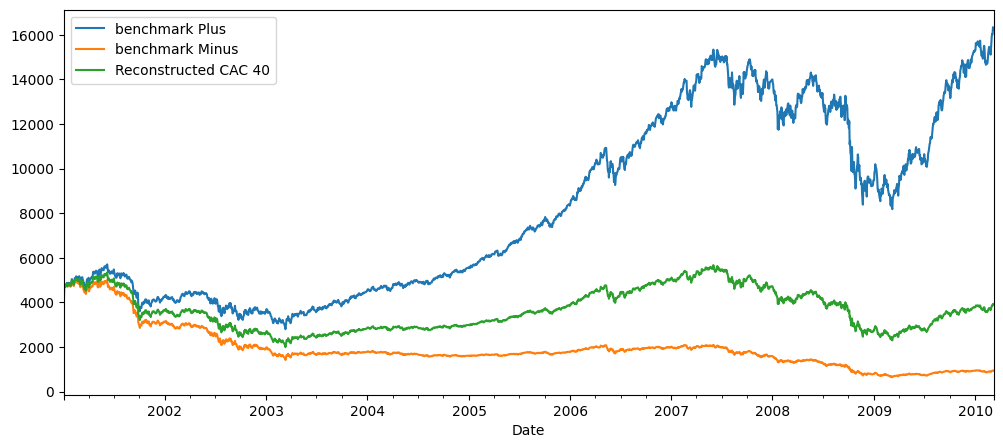

In [13]:
pd.concat([benchPlus, benchMinus, Reconst_CAC40], axis=1).plot(figsize=(12, 5))
plt.legend(["benchmark Plus", "benchmark Minus", "Reconstructed CAC 40"])
plt.show()

In [45]:
#Calibration_period et rebalancing_period  a donner en nombre de jours et start_Date en jours  0_based
class Portfolio():
  def __init__(self, data  , Initial_Budget, weights  , Stock_number, Calibration_period, rebalancing_period,index, log_index, stocks = None):

    temp = pd.Series(np.nan, index=Weights[Calibration_period :].index, name="Portfolio Value")
    temp.iloc[0] = Initial_Budget

    self.data = data
    self.prices = temp
    self.weights = weights
    self.Stock_number = Stock_number
    self.Calibration_period = Calibration_period
    self.rebalancing_period = rebalancing_period
    self.stocks = stocks
    self.rang_rempli = 0
    self.continuer = 1
    self.log_index = log_index
    self.index = index
    self.transaction = pd.DataFrame(0, index = self.weights.iloc[Calibration_period:,:].index, columns= self.weights.iloc[Calibration_period:,:].columns, dtype = "float64")

  def price_evolution(self, start_date):
    Prix_stocks = self.data.loc[self.data.index[self.Calibration_period]: , list(self.stocks)]
    prix_initiale = self.prices.iloc[start_date-1]
    t = start_date
    for t in range(start_date , min(start_date + self.rebalancing_period, len(self.prices)))  :
      temp = self.weights * Prix_stocks.iloc[t,:] /  Prix_stocks.iloc[start_date-1,:]
      self.prices.iloc[t] = prix_initiale * np.sum(temp)
      self.rang_rempli += 1
    return

  def Select_stocks(self, start_date):
    stocks = set()
    temp = self.data.iloc[start_date, : ]
    for _ in range(self.Stock_number):
      stocks.add(temp.idxmax())
      temp = temp.drop(temp.idxmax())
    self.stocks = stocks
    return

  def Calibrate(self, start_date):
    self.Select_stocks(start_date= start_date)
    X = np.log(Prices.loc[Prices.index[start_date]:Prices.index[start_date + self.Calibration_period],list(self.stocks)].values)
    X = np.column_stack((np.ones(len(X)), X))
    y = self.log_index.iloc[start_date:start_date+self.Calibration_period+1].values
    A, residuals, rank, s = np.linalg.lstsq(X, y, rcond=None)
    resid = y - np.dot(X, A)

    if adfuller(resid)[1] < 0.05:
      self.weights = A[1:] / np.sum(A[1:])
      self.transaction.loc[self.transaction.index[self.rang_rempli],list(self.stocks)] = self.weights
      self.prices.iloc[start_date] = self.prices.iloc[start_date-1]
      self.rang_rempli += 1
    else:
      print("Le portfeuil résultant de cette methode de selection n'est pas cointégré avec l'indice du CAC40 /n")
      print("Fermeture de Positions ...")
      self.continuer = 0
    return



  def Backtest(self):
    while self.continuer and self.rang_rempli < len(self.prices)-1:
      self.Calibrate(self.rang_rempli+1)
      if self.rang_rempli < len(self.prices)-1:
        self.price_evolution(self.rang_rempli+1)


  def Results(self):
    self.Backtest()

    data_returns = np.log(self.index.iloc[self.Calibration_period:].astype("float64")) - np.log(self.index.iloc[self.Calibration_period:].shift(1).astype("float64") )
    Tracking_Portfolio_returns = np.log(self.prices) - np.log(self.prices.shift(1))
    Cumulative_data_returns = data_returns.cumsum()
    Cumulative_Tracking_Portfolio_returns = Tracking_Portfolio_returns.cumsum()
    Cumulative_data_simple_returns = np.exp(Cumulative_data_returns) - 1
    Cumulative_Tracking_Portfolio_simple_returns = np.exp(Cumulative_Tracking_Portfolio_returns) - 1
    fig , ax = plt.subplots(nrows = 1 , ncols =2 , figsize = (20, 5))
    Tracking_Portfolio_returns.plot(ax = ax[0], label = "Tracking Portfolio")
    data_returns.plot(ax = ax[0], label = "Index")
    ax[0].set_title("Returns Comparaison")
    ax[0].legend()

    Cumulative_Tracking_Portfolio_simple_returns.plot(ax = ax[1], label = "Tracking Portfolio")
    Cumulative_data_simple_returns.plot(ax = ax[1], label = "Indice")
    ax[1].set_title("Cumulative Returns Comparaison")
    ax[1].legend()
    fig.suptitle(f"Performance du Tracking Avec {self.Stock_number} Actions , Rebalancement tout les {self.rebalancing_period} jours et une periode de calibration de {int(self.Calibration_period / 365)} Ans ", fontsize=10)


    plt.show()

  def Compare(self):
    fig , ax = plt.subplots(nrows = 1 , ncols =2 , figsize = (12, 5))
    self.prices.plot(ax = ax[1], label = "Tracking Portfolio")
    self.index.iloc[self.Calibration_period:].plot(ax = ax[0], label = "Index")
    ax[0].set_title("Index")
    ax[1].set_title("Tracking Portfolio")

    plt.show()



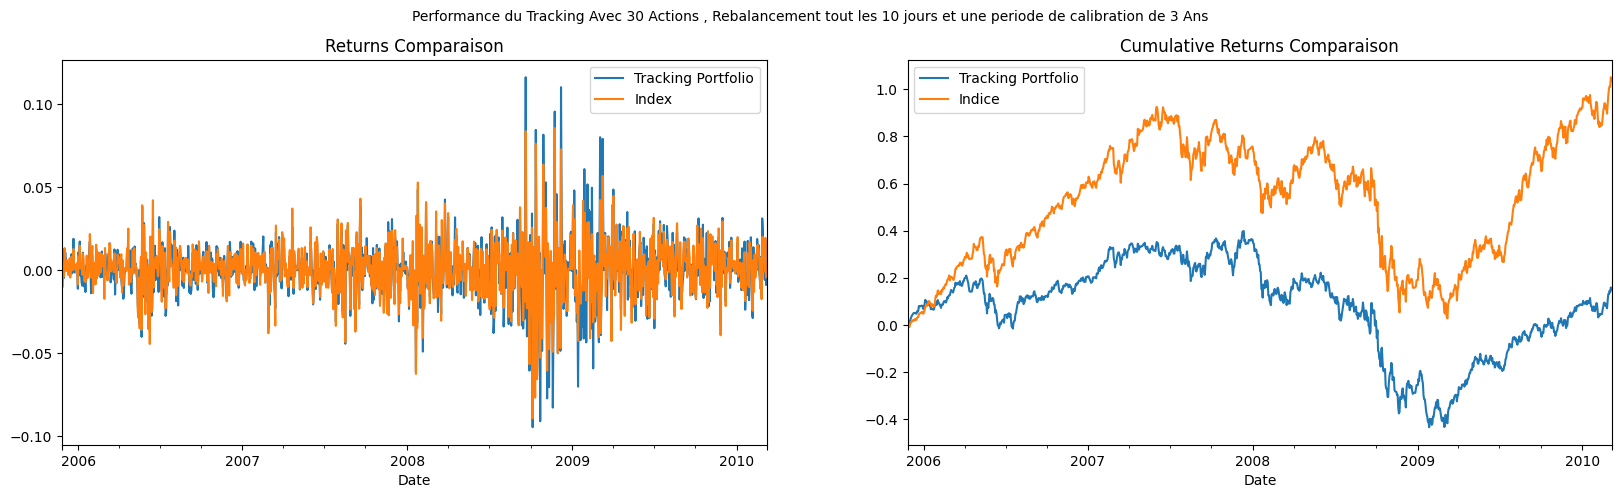

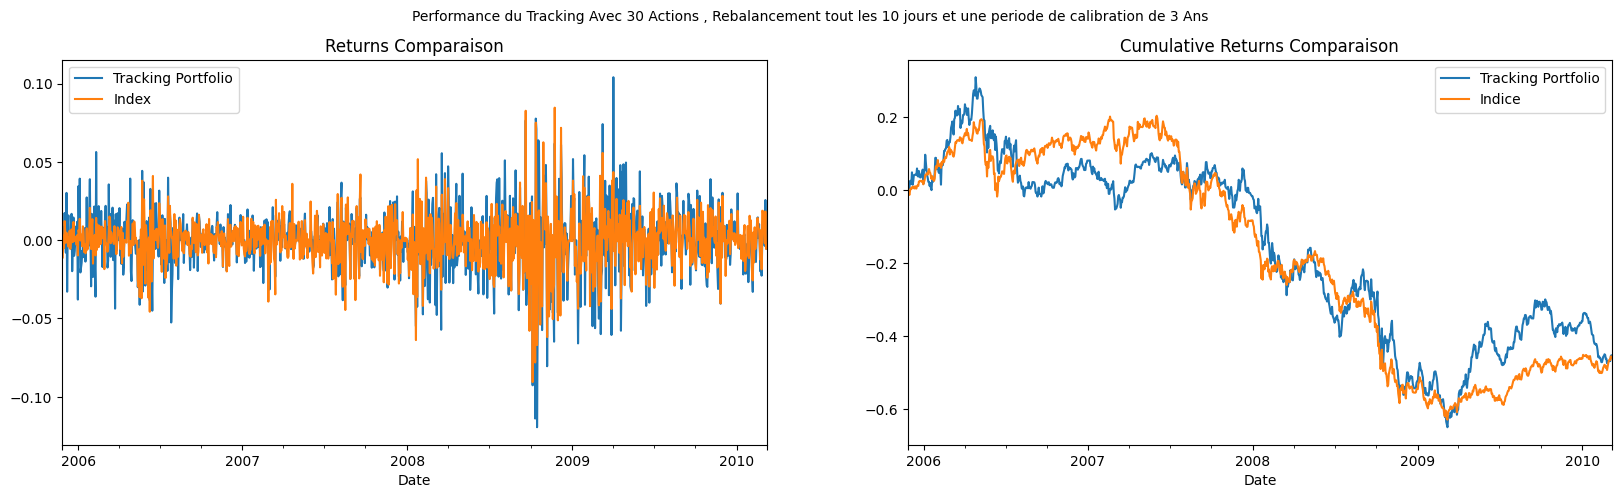

In [46]:
Initial_Budget = 4000
Stock_number = 30
Calibration_period = 3*365 + 183
rebalancing_period = 10
coef_TC=0.002
Prices_without_cac = Prices.drop(columns = ["CAC 40"])
portfeuilPlus = Portfolio(data = Prices_without_cac, Initial_Budget= Initial_Budget/2 ,  weights = Weights, Stock_number= Stock_number, Calibration_period= Calibration_period , rebalancing_period= rebalancing_period, index = benchPlus, log_index=np.log(benchPlus.astype("float64")))
portfeuilPlus.Results()
portfeuilMinus = Portfolio(data = Prices_without_cac, Initial_Budget= Initial_Budget/2 ,  weights = Weights, Stock_number= Stock_number, Calibration_period= Calibration_period , rebalancing_period= rebalancing_period, index = benchMinus, log_index=np.log(benchMinus.astype("float64")))
portfeuilMinus.Results()
transaction_costs=pd.Series(0.,portfeuilPlus.prices.index)




<Axes: xlabel='Date'>

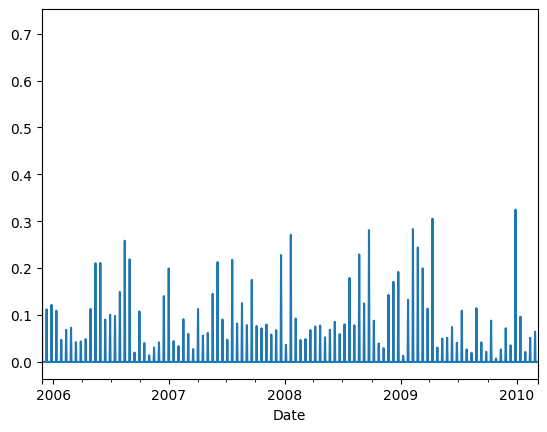

In [16]:
transaction_costs.iloc[0]=coef_TC*np.sum(np.abs(portfeuilPlus.transaction.iloc[0]-portfeuilMinus.transaction.iloc[0])*Prices_without_cac.loc[portfeuilMinus.transaction.index[0]])
i = 11
while i < len(portfeuilPlus.transaction) :
  transaction_costs.iloc[i]=coef_TC*np.sum(np.abs((portfeuilPlus.transaction.iloc[i]-portfeuilMinus.transaction.iloc[i])-(portfeuilPlus.transaction.iloc[i-11]-portfeuilMinus.transaction.iloc[i-11]))*Prices_without_cac.loc[portfeuilMinus.transaction.index[i]])
  i+=11
transaction_costs.plot()

In [17]:
transaction_costs.sum()

np.float64(10.945313327524174)

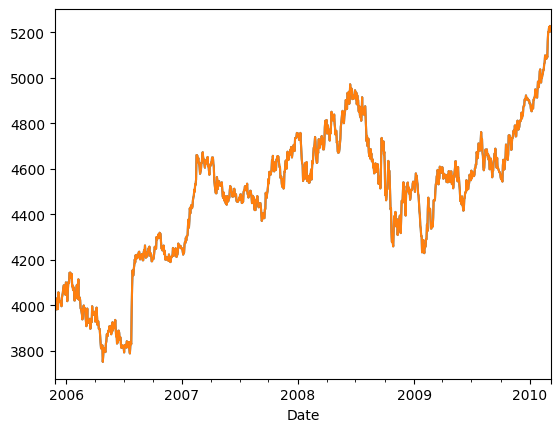

In [18]:
totalPrices_wo_TC=Initial_Budget+portfeuilPlus.prices-portfeuilMinus.prices
totalPrices=totalPrices_wo_TC-transaction_costs
plt.figure()
totalPrices_wo_TC.plot()
totalPrices.plot()
plt.show()


In [19]:
from statsmodels.tsa.stattools import adfuller
from scipy.stats import skew, kurtosis

In [20]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from scipy.stats import skew, kurtosis

def clean_series(series):
    """Cleans price series by removing zeros, NaNs, and Infs before log transform"""
    series = series.replace([np.inf, -np.inf], np.nan)  # remove infs
    series = series[series > 0]  # log(0) and negative prices are invalid
    return series.dropna()

def compute_engle_granger(prices, index):
    """
    Engle-Granger test after cleaning the data
    """
    import statsmodels.api as sm
    prices = clean_series(prices)
    index = clean_series(index)

    # Align both series on the same dates after cleaning
    data = pd.concat([np.log(index), np.log(prices)], axis=1).dropna()
    log_index, log_prices = data.iloc[:, 0], data.iloc[:, 1]

    X = sm.add_constant(log_prices)
    model = sm.OLS(log_index, X).fit()
    resid = model.resid
    adf_stat, pval, _, _, crit_vals, _ = adfuller(resid)
    return {
        "ADF Statistic": adf_stat,
        "p-value": pval,
        "Critical Values": crit_vals
    }


def compute_returns(prices):
    """
    Daily log returns from price series
    """
    return np.log(prices / prices.shift(1)).dropna()

def compute_strategy_metrics(prices, index, risk_free_rate=0.):
    prices = clean_series(prices)
    index = clean_series(index)

    # Align and compute returns
    returns = compute_returns(prices)
    index_returns = compute_returns(index)
    returns, index_returns = returns.align(index_returns, join='inner')

    # Compute metrics
    mean_return_ann = returns.mean() * 252
    volatility_ann = returns.std() * np.sqrt(252)
    correlation = returns.corr(index_returns)
    skewness = skew(returns)
    excess_kurtosis = kurtosis(returns)
    sharpe = (mean_return_ann - risk_free_rate) / volatility_ann

    return {
        "Mean Annual Return": mean_return_ann,
        "Annual Volatility": volatility_ann,
        "Correlation with Index": correlation,
        "Skewness": skewness,
        "Excess Kurtosis": excess_kurtosis,
        "Sharpe Ratio": sharpe
    }



In [21]:
# Assuming you already have 'Prices' and 'Index' pandas Series aligned on trading dates
results_a = compute_engle_granger(totalPrices, CAC40)
results_b_to_f = compute_strategy_metrics(totalPrices, CAC40)

# Display all results
print("a. Engle-Granger Test:")
print(results_a)

print("\n(b–f) Strategy Performance Metrics:")
for key, value in results_b_to_f.items():
    print(f"{key}: {value:.4f}")


a. Engle-Granger Test:
{'ADF Statistic': np.float64(-1.1093933367620128), 'p-value': np.float64(0.7113114505821738), 'Critical Values': {'1%': np.float64(-3.436265626824956), '5%': np.float64(-2.864152052269338), '10%': np.float64(-2.568160735738769)}}

(b–f) Strategy Performance Metrics:
Mean Annual Return: 0.0599
Annual Volatility: 0.1005
Correlation with Index: 0.2207
Skewness: 0.2400
Excess Kurtosis: 2.4531
Sharpe Ratio: 0.5964


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

def ewma_correlation(df1, df2, lambda_=0.94):

    df1, df2 = df1.align(df2, join='inner')

    ewma_var1 = df1.ewm(span=(2 / (1 - lambda_)) - 1).var()
    ewma_var2 = df2.ewm(span=(2 / (1 - lambda_)) - 1).var()
    ewma_cov = df1.ewm(span=(2 / (1 - lambda_)) - 1).cov(df2)

    ewma_corr = ewma_cov / (ewma_var1 ** 0.5 * ewma_var2 ** 0.5)

    return ewma_corr

def plot_strategy_performance(strategy_prices, index_prices, risk_free_rate=0.):
    fig, axes = plt.subplots(ncols = 2, nrows= 1, figsize=(60, 10))

    # Ensure clean & aligned
    strategy_prices = clean_series(strategy_prices)
    index_prices = clean_series(index_prices)
    prices = pd.concat([strategy_prices, index_prices], axis=1).dropna()
    prices.columns = ['Strategy', 'Index']

    # Compute returns
    returns = compute_returns(prices['Strategy']).replace([np.inf, -np.inf], np.nan).dropna()
    index_returns = compute_returns(prices['Index'])

    # Align returns
    returns, index_returns = returns.align(index_returns, join='inner')

    # Compute cumulative returns
    cum_returns = returns.cumsum()
    cum_index_returns = index_returns.cumsum()

    # Rolling volatility and Sharpe ratio
    # Rolling window
    window = 20

    # Rolling volatility
    rolling_vol = returns.rolling(window=window).std() * np.sqrt(252)
    rolling_vol_index = index_returns.rolling(window=window).std() * np.sqrt(252)

    # Rolling Sharpe
    rolling_sharpe = (returns.rolling(window=window).mean() * 252 - risk_free_rate) / rolling_vol
    rolling_sharpe_index = (index_returns.rolling(window=window).mean() * 252 - risk_free_rate) / rolling_vol_index

    # Rolling correlation
    rolling_corr = returns.rolling(window=window).corr(index_returns)

    # Rolling skewness
    rolling_skew = returns.rolling(window=window).apply(skew, raw=True)
    rolling_skew_index = index_returns.rolling(window=window).apply(skew, raw=True)

    # Rolling excess kurtosis
    rolling_kurt = returns.rolling(window=window).apply(kurtosis, raw=True)
    rolling_kurt_index = index_returns.rolling(window=window).apply(kurtosis, raw=True)

    # EWM correlation
    ewma_corr = ewma_correlation(returns, index_returns)

    """"
     === 1. Cumulative returns plot
    fig2, axes2 = plt.subplots(ncols = 1, nrows= 1, figsize=(9, 12))
    ax= axes2
    ax.plot(cum_returns, label='Strategy')
    ax.plot(cum_index_returns, label='Index', alpha=0.7)
    ax.set_title('Cumulative Returns')
    ax.legend()
    ax.grid(True)
    """


    # === 2. Rolling volatility
    ax= axes[0]
    ax.plot(rolling_vol, label='Strategy')
    ax.plot(rolling_vol_index, label='Index')
    ax.set_title('Rolling Annualized Volatility '+str(window)+"d")
    ax.grid(True)
    ax.legend()

    # === 3. Rolling Sharpe ratio
    ax= axes[1]

    ax.plot(rolling_sharpe, label='Strategy')
    ax.plot(rolling_sharpe_index, label='index')
    ax.axhline(0, color='gray', linestyle='--', linewidth=1)
    ax.set_title('Rolling Sharpe Ratio '+str(window)+"d")
    ax.grid(True)
    ax.legend()

    fig, axes = plt.subplots(ncols = 2, nrows= 1, figsize=(60, 10))
    # === 4. Rolling Correlation
    ax= axes[0]
    ax.plot(rolling_corr, label="Strategy")
    ax.axhline(0, color='gray', linestyle='--', linewidth=1)
    ax.set_title('Rolling Correlation with Index '+str(window)+"d")
    ax.grid(True)
    ax.legend()


    # === 5. Histogram of daily returns
    ax= axes[1]
    # Define common bins for both histograms
    combined_data = np.concatenate([returns, index_returns])
    common_bins = np.histogram_bin_edges(combined_data, bins=50)

    sns.histplot(returns, bins=common_bins, stat="probability", kde=True, label="Strategy", ax = ax)
    sns.histplot(index_returns, bins=common_bins, stat="probability", kde=True, label="Index", ax = ax)

    ax.set_title('Histogram of Daily Returns')
    ax.set_xlabel('Daily Return')
    ax.grid(True)
    ax.legend()

    fig, axes = plt.subplots(ncols = 2, nrows= 1, figsize=(60, 10))
    # === 6. QQ-Plot
    ax=axes[0]

    # Plot Q-Q plot for strategy returns
    res = stats.probplot(returns, dist="norm")
    ax.scatter(res[0][0], res[0][1], label="QQ-Plot of Daily Returns of Strategy", color='blue')
    ax.plot(res[0][0], res[0][0] * res[1][0] + res[1][1], color='black')

    # Plot Q-Q plot for index returns
    res2 = stats.probplot(index_returns, dist="norm")
    ax.scatter(res2[0][0], res2[0][1], label="QQ-Plot of Daily Returns of Index", color='red')
    ax.plot(res2[0][0], res2[0][0] * res2[1][0] + res2[1][1], color='black', linestyle="dashed")

    ax.set_title('QQ-Plot of Daily Returns')
    ax.grid(True)
    ax.legend()

    # === 7. Rolling Skewness
    ax = axes[1]
    ax.plot(rolling_skew, label='Strategy')
    ax.plot(rolling_skew_index, label='Index')
    ax.axhline(0, color='gray', linestyle='--', linewidth=1)
    ax.set_title('Rolling Skewness ' + str(window) + "d")
    ax.grid(True)
    ax.legend()

    fig, axes = plt.subplots(ncols = 2, nrows= 1, figsize=(60, 10))
    # === 8. Rolling Excess Kurtosis
    ax = axes[0]
    ax.plot(rolling_kurt, label='Strategy')
    ax.plot(rolling_kurt_index, label='Index')
    plt.axhline(0, color='gray', linestyle='--', linewidth=1)
    ax.set_title('Rolling Excess Kurtosis '+str(window)+"d")
    ax.grid(True)
    ax.legend()

    # === 9. EWM Correlation
    ax = axes[1]
    ax.plot(ewma_corr, label="Strategy")
    ax.axhline(0, color='gray', linestyle='--', linewidth=1)
    ax.set_title("EWM Correlation with Index Lambda = 0.94")
    ax.grid(True)
    ax.legend()


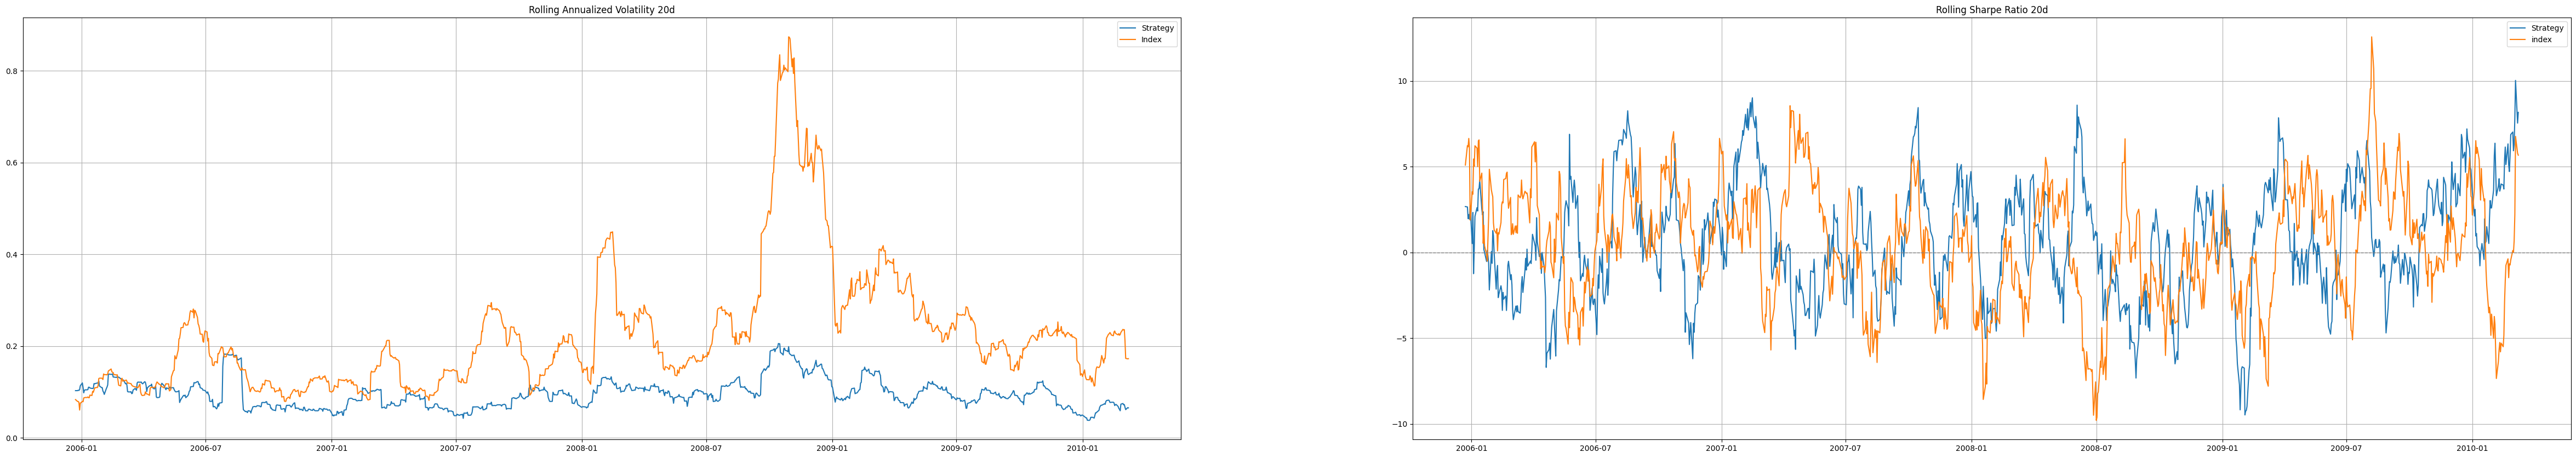

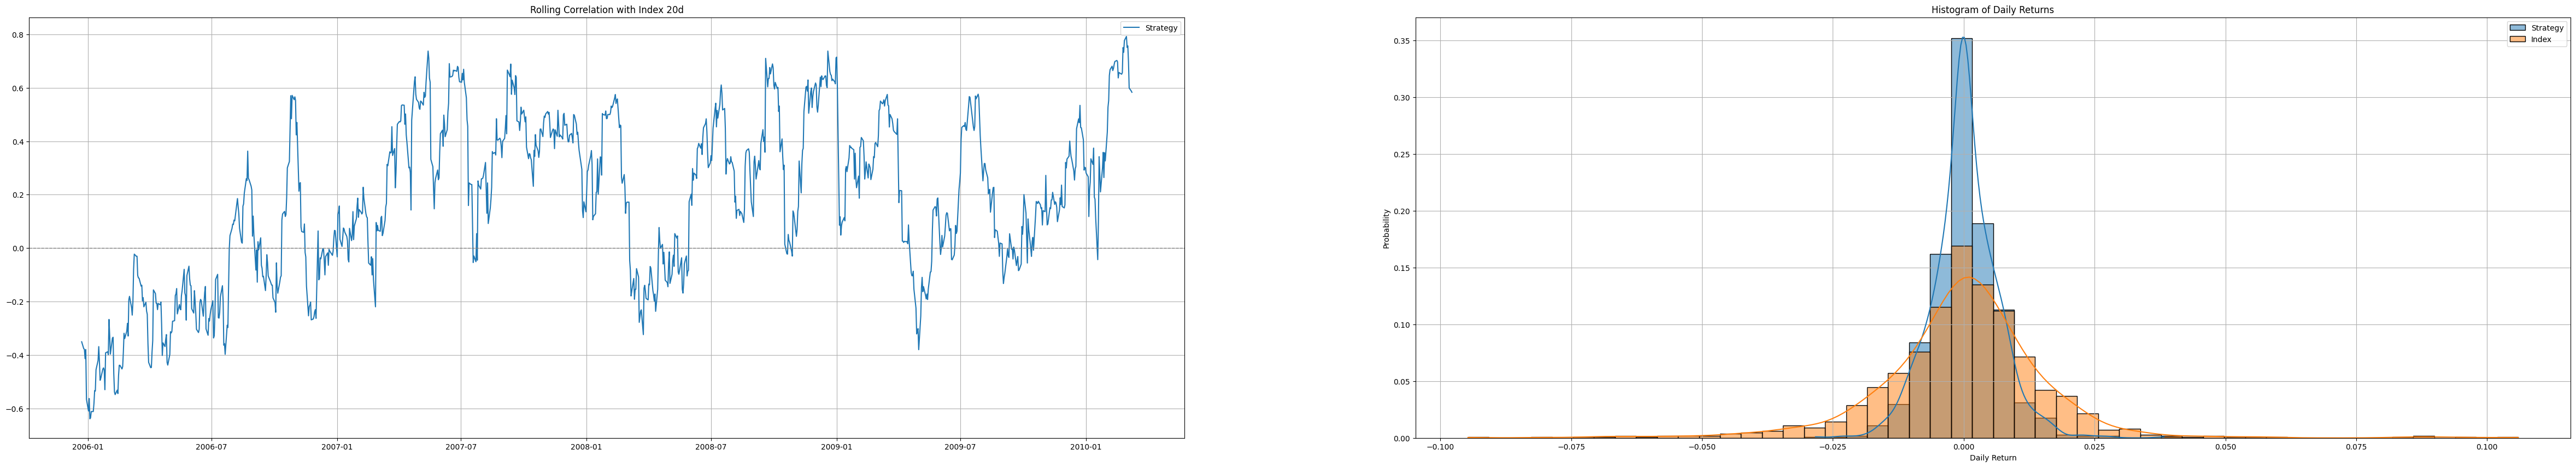

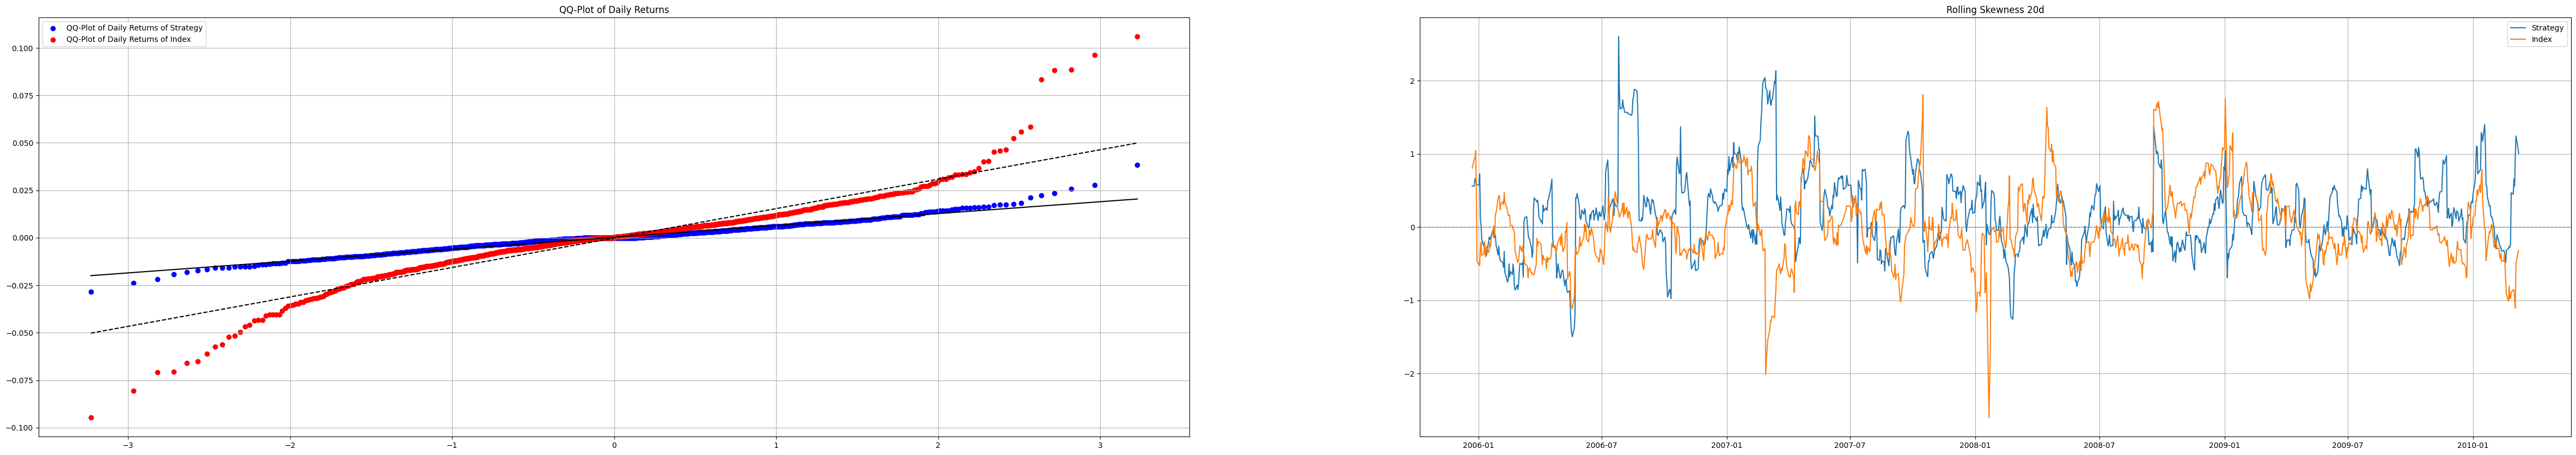

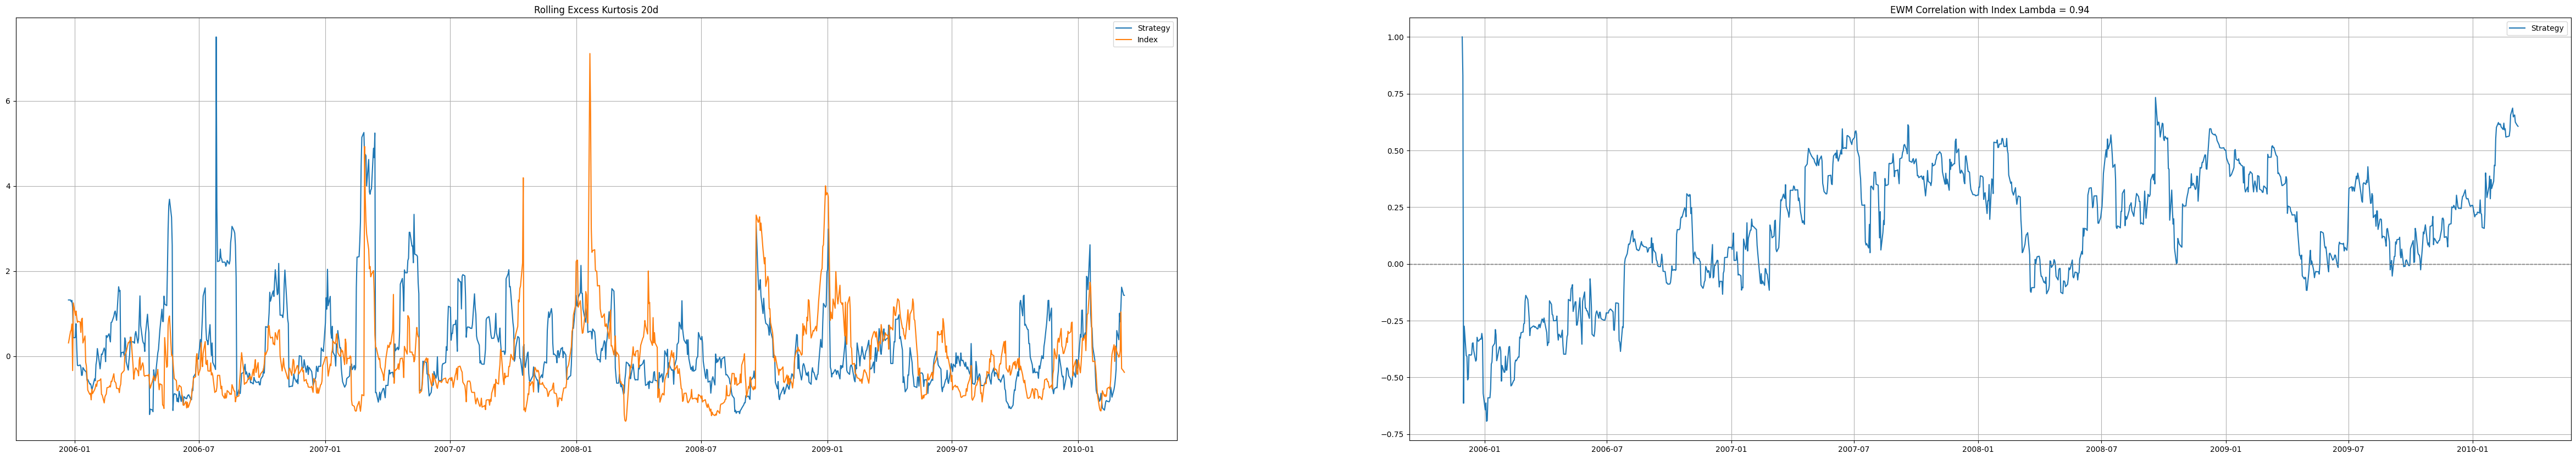

In [44]:
# Use with strategy and index series (e.g., totalPrices, CAC40)
plot_strategy_performance(totalPrices, CAC40)
